# Integralrechnung

*Notebook erstellt am 29.09.2022 von C. Rockstuhl, überarbeitet von Y. Augenstein*

*Abbildungen in diesem Notebook wurden dem Script "Computational Physics" von Prof. T. Pertsch (Uni-Jena) entnommen*

In diesem Notebook werden wir einige Details zur Integralrechnung besprechen. Wir werden dieses Notebook in zwei Abschnitte unterteilen und einmal diskutieren, wie wir symbolisch ausgewählte Integrale lösen können, und zum anderen werden wir diskutieren, wie wir diese numerisch evaluieren können.  

## Symbolisches Lösen von Integralen 

Wie bereits in früheren Notebooks, in denen wir symbolisch differenziert haben, benutzen wir hier wieder die Bibliothek SymPy. Mehr Informationen und eine ausführliche Dokumentation finden Sie hier: [https://www.sympy.org](https://www.sympy.org/en/index.html).

Hierfür importieren wir wieder das Modul `sympy` sowie einige symbolische Variablen, die wir noch benötigen werden.

In [1]:
from IPython.display import display  # zum Anzeigen von Gleichungen
import sympy
from sympy.abc import a, b, x, y
from sympy import Integral, Eq, S  # dient nur der Anzeige von Integralen und Gleichungen

Nun definieren wir wieder eine einfache Funktion. Wir nehmen hier ein Beispiel aus der Vorlesung.

In [2]:
f = 3 * x**3 - 2 * x

Eq(S("f"), f)   # Dient nur der Ausgabe. Die Logik der Ausgabe ist, dass die linke und die rechte Seite der 
                # Gleichung spezifiziert werden und man sich diese Anzeigen läst. 
                # Die Funktion S 'sympifiziert' einmal den vorhandenen Ausdruck. In unserem Fall einfach f.
        

Eq(f, 3*x**3 - 2*x)

Das Erste, was wie wieder machen möchten, ist die Evaluation der Funktion an einem bestimmten Wert für $x$. Hierfür können wie den Befehl `f.subs` verwenden, der einen entsprechenden Wert für $x$ substituiert in den Ausdruck der Funktion $f(x)$.

In [3]:
z = f.subs(x, 2)
print(f"3(2)^3 - 2*2 = {z}")  # Und wir geben uns das Ergebnis aus.

3(2)^3 - 2*2 = 20


Um jetzt unsere Funktion `f` bezüglich `x` zu integrieren, verwenden wir `integrate()`.

In [4]:
intf = f.integrate(x)

Eq(Integral(f, x), intf)    # Hier dient die Funktion Integral zur Visulisierung des entsprechenden Integrals.
                            # Und auch hier werden wieder die linke und die rechte Seite der Gleichung 
                            # spezifiziert.

Eq(Integral(3*x**3 - 2*x, x), 3*x**4/4 - x**2)

Alternativ kann man für diesen Zweck auch den etwas allgemeineren Funktionsaufruf verwenden.

In [5]:
intf = sympy.integrate(f, x)

Eq(Integral(f, x), intf)

Eq(Integral(3*x**3 - 2*x, x), 3*x**4/4 - x**2)

Die obigen Beispiele sind unbestimmte Integrale von $f(x)$. Wir können aber auch bestimmte Integrale mit derselben `integrate()`-Funktion auswerten. Wir müssen hierfür lediglich der Funktion die entsprechenden Integrationsgrenzen als Argumente mit übergeben.

In [6]:
intf = sympy.integrate(f, (x, 0, 3))  # alternativ auch hier wieder: f.integrate((x, 0, 3))

Eq(Integral(f, (x, 0, 3)), intf)

Eq(Integral(3*x**3 - 2*x, (x, 0, 3)), 207/4)

Beachten Sie bitte, dass Sie an dieser Stelle immer noch rein symbolisch rechnen. Wenn Sie das gewünschte Ergebnis in einer numerisch besser verarbeitbaren Form benötigen, müssen Sie es z.B. in eine Gleitkommazahl (`float`) umwandeln. Mehr Informationen zu numerischen Typen finden Sie hier: https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-complex

In [7]:
float(intf)

51.75

Ebenso können Sie Symbole als Integrationsgrenzen verwenden, um z.B. einfach nur zwischen $a$ und $b$ zu integrieren.

In [8]:
intf = f.integrate((x, a, b))

Eq(Integral(f, (x, a, b)), intf)

Eq(Integral(3*x**3 - 2*x, (x, a, b)), -3*a**4/4 + a**2 + 3*b**4/4 - b**2)

Wir können unsere Funktionen auch komplizierter machen und sie, zum Beispiel, von zwei Variablen abhängen lassen. In unserem Fall wäre das $x$ und $y$ und die Funktion lautet:
$$
g(x,y)=x \sin (xy). 
$$

In [9]:
g = x * sympy.sin(x * y)

Eq(S("g"), g)

Eq(g, x*sin(x*y))

In [10]:
intg = g.integrate(x)

Eq(Integral(g, x), intg)

Eq(Integral(x*sin(x*y), x), Piecewise((-x*cos(x*y)/y + sin(x*y)/y**2, Ne(y, 0)), (0, True)))

Beachten Sie, dass das Ergebnis dieses Integrals davon abhängt, ob $y$ Null ist oder eben gerade verschieden von Null. Wir können auch von Anfang an spezifizieren und bei der erstmaligen Definition festlegen, dass unsere Variablen ungleich Null sind.

In [11]:
x = sympy.Symbol("x", nonzero=True)
y = sympy.Symbol("y", nonzero=True)

g = x * sympy.sin(x * y)

Eq(S("g"), g)

Eq(g, x*sin(x*y))

Wenn wir nun wieder wie oben über $x$ integrieren, erhalten wir nur noch ein Ergebnis.

In [12]:
intgx = g.integrate(x)

Eq(Integral(g, x), intgx)

Eq(Integral(x*sin(x*y), x), -x*cos(x*y)/y + sin(x*y)/y**2)

Wir können selbstverständlich auch über die andere Koordinate ($y$) integrieren.

In [13]:
intgy = g.integrate(y)

Eq(Integral(g, y), intgy)

Eq(Integral(x*sin(x*y), y), -cos(x*y))

Um einen etwas allgemeineren Zugang zu bekommen, können wir im Folgenden auch die eigentliche Funktionsdefinition in eine Python Funktion auslagern und dann im Folgenden nur mit einem allgemeinen Beispiel rechnen. Dafür definieren wir uns als erstes eine passende Funktion. 

In [14]:
def f(x):
    return 3 * x**3 - 2 * x

Und dann können wir alle Befehle, die wir oben verwendet haben, ganz allgemein auf die Funktion $f$ anwenden und ganz normal damit rechnen. 

In [15]:
intf = f(x).integrate(x)

Eq(Integral(f(x), x), intf)

Eq(Integral(3*x**3 - 2*x, x), 3*x**4/4 - x**2)

In [16]:
intf = sympy.integrate(f(x), (x, a, b))

Eq(Integral(f(x), (x, a, b)), intf)

Eq(Integral(3*x**3 - 2*x, (x, a, b)), -3*a**4/4 + a**2 + 3*b**4/4 - b**2)

Wir können genauso gut Funktionen mit mehreren Variablen verwenden und dann anschließend doppelte Integrale durchführen.

Hierfür definieren wir zunächst eine Funktion, die von $x$ und $y$ abhängt.

In [17]:
def g(x, y):
    return x * sympy.sin(x * y)

Das unbestimmt Integral können wir nun auswerten, indem wir explizit zwei Integrale ausführen.

In [18]:
intg = sympy.integrate(sympy.integrate(g(x, y), y), x)

Eq(Integral(Integral(g(x, y), y), x), intg)

Eq(Integral(x*sin(x*y), y, x), -sin(x*y)/y)

Oder alternativ können wir auch in einem Aufruf von `integrate()` mehrere Variablen angeben.

In [19]:
intg = sympy.integrate(g(x, y), y, x)

Eq(Integral(g(x, y), y, x), intg)

Eq(Integral(x*sin(x*y), y, x), -sin(x*y)/y)

Bestimmte Integrale können wir ganz analog auswerten.

In [20]:
intg = sympy.integrate(g(x, y), (y, 1, 3), (x, -2, -1))

Eq(Eq(Integral(g(x, y), (y, 1, 3), (x, -2, -1)), intg), float(intg), evaluate=False)
                                    # Beachten Sie bitte das letzte Argument.
                                    # Eq in Sympy wird verwendet, um zu prüfen, 
                                    # ob zwei Ausdrücke mathematisch gleich sind. 
                                    # Hier würde die Auswertung ein 'false ergeben', 
                                    # da der analyische Ausdrucke natürlich niemals gleich 
                                    # sein wird zu dem numerischen. Das würde uns hier
                                    # aber nicht interessieren.
                                    # Sie können die Auswertung mit evaluate = falsch 
                                    # verhindern. 
    
    
    

Eq(Eq(Integral(x*sin(x*y), (y, 1, 3), (x, -2, -1)), -sin(1) + sin(3)/3 - sin(6)/3 + sin(2)), 0.20800494410405)

Schauen Sie sich bitte einmal die Dokumentation von SymPy an. Dort werden Sie sehen, dass es noch andere Befehle gibt zur Evaluation symbolischer Ausdrücke. Zum Beispiel mit der `N()`-Funktion erhalten Sie ein ähnliches Ergebnis. Hier können Sie auch noch die Anzahl der Stellen angeben, mit denen der Ausdruck numerisch evaluiert werden soll. Wenn Sie kein Argument angeben, erfolgt die Evaluation auf 15 Nachkommastallen, was gerade double-precision entspricht.

In [21]:
print(sympy.N(intg, 50))
print(sympy.N(intg, 3))

0.20800494410404955371428429408811418957133462017301
0.208


Abschliessend können wir hier noch das letzte Beispiel aus der Vorlesung am Computer lösen. Hier lautete das zu lösende Integral
$$
\int_{\sqrt{\pi}}^{2\sqrt{\pi}}2x\cos x^2 \mathrm{d}x
$$
Wir definieren uns das ganz einfach im Folgenden als unsere Funktion und evaluieren dann das bestimmte Integral.

In [22]:
def f(x):
    return 2 * x * sympy.cos(x**2)

In [23]:
intf = sympy.integrate(f(x))

Eq(Integral(f(x), x), intf)

Eq(Integral(2*x*cos(x**2), x), sin(x**2))

In [24]:
intf = sympy.integrate(f(x), (x, sympy.sqrt(sympy.pi), 2 * sympy.sqrt(sympy.pi)))

Eq(Integral(f(x), (x, sympy.sqrt(sympy.pi), 2 * sympy.sqrt(sympy.pi))), intf, evaluate=False)

Eq(Integral(2*x*cos(x**2), (x, sqrt(pi), 2*sqrt(pi))), 0)

## Numerisches Lösen von Integralen 

Viele der relevanten Integrale in der Vorlesung werden wir analytisch lösen. Praktisch ist es aber so, dass dies in (ferner) Zukunft nicht immer möglich sein wird. Daher würden wir im Folgenden auch einige Grundzüge der numerischen Integration besprechen. 

Als Erinnerung, das Integral allgemein ist definiert als die Fläche unter einer Funktion.

Hierfür importieren wir zunächst wieder `NumPy` (unsere go-to Bibliothek für numerisches Rechnen in Python) sowie `matplotlib` zum Visualisieren der Ergebnisse.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

Nun geben wir das `x`-Achsenintervall an, auf dem wir unsere Funktion auswerten möchten und berechnen die Funktionswerte an den entsprechenden Punkten. Beachten Sie, dass wir hier unsere Funktion nicht explizit definieren, sondern einfach direkt auswerten. Im Prinzip könnte man natürlich auch `def f(x): ...` verwenden, ist hier aber nicht zwingend notwendig.

In [26]:
x = np.linspace(-2.5, 2.5, 100)  # 100 Punkte zwischen -2.5 und 2.5
f = np.exp(-(x**2))  # unsere Funktionswerte

Und schlussendlich visualisieren wir das Ganze.

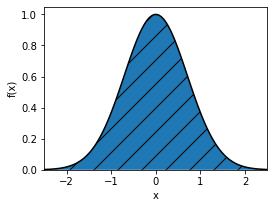

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))  # wir initialisieren die Grafik
ax.plot(x, f, color="black")  # x und f sind gleich große Arrays, die Punkt für Punkt geplottet werden
ax.fill_between(x, f, hatch="/")  # die Fläche unter der Funktion
ax.set_xlim(x[0], x[-1])  # x-Achsen limits
ax.set_ylim(0, None)  #  y-Achsen limits
ax.set_xlabel("x")  # x-Achsenbeschriftung
ax.set_ylabel("f(x)")  # x-Achsenbeschriftung
plt.show()  # und nun zeigen wir das Ganze an

Numerisch werden wir keine unbestimmten Integrale lösen können sondern nur bestimmte. Daher betrachten wir im Folgenden numerische Integrationsverfahren zur Berechnung des bestimmten Integrals einer Funktion $f(x)$ auf einem Intervall $[a,b]$. 
$$
I=\int_a^b f(x)\mathrm{d}x
$$
Hierfür definieren wir uns zunächst ein beliebiges Integrationsinterval.

In [28]:
a, b = -1.2, 0.7

Und dann sieht das Ganze folgerndermaßen aus.

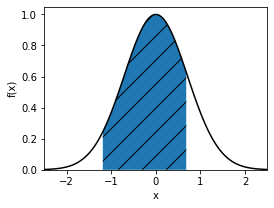

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(x, f, color="black")
int_indices = (a < x) & (x < b)  # zum "Herausfischen" der Indizes, welche innerhalb des Intervalls liegen
ax.fill_between(x[int_indices], f[int_indices], hatch="/")
ax.set_xlim(x[0], x[-1])
ax.set_ylim(0, None)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.show()

Wir werden am Anfang sehen, wie wir die Integration solcher Integrale explizit durchführen können. Praktisch wird es aber so sein, dass Sie implementierte Routinen verwenden werden, die in Python durch geeignete Bibliotheken zur Verfügung gestellt werden. Nichtsdestotrotz ist es überaus hilfreich zu verstehen, wie diese Routinen funktionieren, um sie sinnvoll anzuwenden.

Als Zweites sei gesagt, dass die Grundaufgabe immer darin besteht, mit möglichst wenig Rechenaufwand das Integral möglichst präzise zu berechnen. Der Rechenaufwand wird hier verstanden als die Anzahl der Funktionsevaluationen. Für viele der hier besprochenen Funktionen ist der numerische Aufwand nicht besonderns groß und nominell können Sie problemlos sehr viele Funktionsevaluationen durchführen in sehr kurzer Zeit. Dies wird aber in Zukunft nicht immer der Fall sein. Daher ist eine effektive Art der Berechnung besimmter Integrale notwendig.

Ausgangspunkt aller weiterer Betrachtungen ist die Diskretisierung der $x$-Koordinate in $N$ Teilintervalle durch Definition von $N+1$ Stützstellen. Jedes dieser Teilintervalle geht dann von $x_i$ bis $x_{i+1}$ und die Intervallbreite ist gerade definiert als $h = x_{i+1}-x_i$. Dabei ist $x_0 =a$ und $x_N =b$. Jede Stützstelle ist dann definiert als $x_i=x_0+i\cdot h$. 

![Diskretisierung des Integrationsintervals](Integraldiskretisierung.png "Diskretisierung des Integrationsintervals")

*Diese konstante Diskretisierung vereinfacht unsere Betrachtungen im Folgenden. In der Realität werden Sie tendenziell eher eine adaptive Auflösung verwenden. Bereiche in denen die Funktion sich rasch ändert werden Sie dann feiner diskretisieren. Bereiche in denen die Funktion sich eher wenig ändert werden Sie dann gröber diskretisieren.*

Das von uns zu berechnende Integral, also die Fläche unter der Kurve, ist dann also zerlegt in die Summe der Flächen in jedem einzelnen Teilintegral
$$
I=\sum_{i=0}^{N-1}\int_{x_i}^{x_{i+1}} f(x)\mathrm{d}x
$$

Die Aufgabe besteht nun darin, jedes einzelne Teilintegral möglichst präzise zu bestimmen.

### Vorbereitung

Im Folgenden werden wir zwei Funktionen betrachten. Zuerst betrachten wir die einfache Funktion
$$
f(x)=x \quad .
$$
Das erleichtert uns den Vergleich zum exakten Ergebnis und zur einfachen Visualisierung des Einflusses der Diskretisierung.

Desweiteren betrachten wir noch das bestimmte Integral
$$
I=\int_{\sqrt{\pi}}^{2\sqrt{\pi}}2x\cos x^2\mathrm{d}x \quad ,
$$
Aus der symbolischen Rechnung weiter oben wissen wir, dass dieses bestimmte Integral $0$ ergibt.

Zunächst definieren wir uns also diese beiden Funktionen.

In [30]:
def f(x):
    return x

def g(x):
    return 2 * x * np.cos(x ** 2)

Dann definieren wir uns die Intervalle, auf denen wir diese beiden Funktionen auswerten möchten sowie die Diskretisierung des Raumes, welche wir für beide Funktionen unterschiedlich wählen werden.

In [31]:
# Parameter für f
fa = 0
fb = 2
fN = 8  # Anzahl an Stützstellen für f
fh = (fb - fa) / fN

# Parameter für g
ga = np.sqrt(np.pi)
gb = 2 * np.sqrt(np.pi)
gN = 50  # Anzahl an Stützstellen für f
gh = (gb - ga) / gN

Bevor wir nun zur Integration schreiten, werden wir beide Funktionen noch visualisieren. Hierfür wählen wir eine sehr feine Diskretisierung, um eine möglichst glatte Darstellung der Funktion zu erreichen.

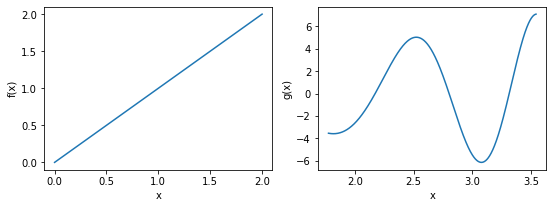

In [32]:
# Wir definieren zunächst die Anzahl an Punkten auf dem Intervall, die wir für die Darstellung wählen.
# 1000 Punkte werden hier als ausreichend fein betrachtet.
# Beachten Sie, dass dies nicht die räumliche Diskretisierung für die Integration betrifft!
n_fine = 1000
fx = np.linspace(fa, fb, n_fine)
f_fine = f(fx)

gx = np.linspace(ga, gb, n_fine)
g_fine = g(gx)

fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].plot(fx, f_fine)
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[1].plot(gx, g_fine)
ax[1].set_xlabel("x")
ax[1].set_ylabel("g(x)")
plt.show()

### Rechteckregel

Die einfachste Art besteht nun darin, die Funktion exakt an nur einem Raumpunkt pro Teilinterval zu evaluieren und die Fläche unter dem Teilinterval als ein Rechteck anzunähern.

![Rechteckregel](Rechteckregel.png "Diskretisierung des Integrals mit Rechtecken")

Beachten Sie hier bitte, dass die Stützstelle in der Mitte des Intervals liegen soll, um das Integral möglichst effizient zu evaluieren. Das können wir uns im Folgenden konkret anschauen. 

Das gesamte Integral ergibt sich dann näherungsweise als
$$
I\approx=\sum_{i=0}^{N-1}\int_{x_i}^{x_{i+1}} f_{i+\frac{1}{2}}\mathrm{d}x=\sum_{i=0}^{N-1}hf_{i+\frac{1}{2}}=\frac{b-a}{N}\sum_{i=0}^{N-1}f_{i+\frac{1}{2}}
$$

Im Folgenden evaluieren wir nun die Rechteckregel für unsere beiden Funktionen.
Wir führen zunächst eine Variable `offset` ein, mit der wir die Stützstelle in jedem Teilintervall verschieben. In der Mitte des Intervalls evaluieren wir die Funktion um $\frac{h}{2}$ verschoben.
Dann erstellen wir uns eine Liste der Stützstellen und werden die Rechteckregel an diesen aus.

#### $f(x)$

Das Ergebnis unserer approximativen Berechnung beträgt 2.0, das exakte Ergebnis ist 2.


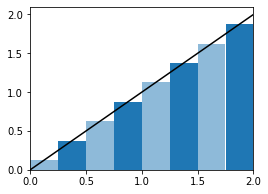

In [33]:
offset = fh / 2 

x = np.arange(fa, fb, fh) + offset  # Stützstellen
approx = fh * np.sum(f(x))  # Rechteckregel

print(f"Das Ergebnis unserer approximativen Berechnung beträgt {approx}, das exakte Ergebnis ist 2.")

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(fx, f_fine, color="black")  # wir plotten die Funktion wie oben
bars = ax.bar(x, f(x), width=fh)  # und die Rechtecke
for bar in bars[::2]:
    bar.set_alpha(0.5)
ax.set_xlim([fa, fb])
ax.set_ylim([0, None])
plt.show()

#### $g(x)$

Die Berechnung des Integrals für $g(x)$ erfolgt analog wie oben.

Das Ergebnis unserer approximativen Berechnung beträgt 0.25037149932651553, wohingegen das exakte Ergebnis 0 betragen sollte.


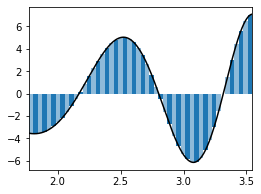

In [34]:
offset = gh / 2   

x = np.arange(ga, gb, gh) + offset
approx = gh * np.sum(g(x))

print(f"Das Ergebnis unserer approximativen Berechnung beträgt {approx}, wohingegen das exakte Ergebnis 0 betragen sollte.")

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(gx, g_fine, color="black")
bars = ax.bar(x, g(x), width=gh)
for bar in bars[::2]:
    bar.set_alpha(0.5)
ax.set_xlim([ga, gb])
plt.show()

Es gibt auch andere Arten der Diskretisierung. Sie können, z.B., die Fläche in jedem Teilinterval mit einem Trapez annähern. Oder Sie können auch Polynome höheren Grades und nicht nur Gerade verwenden, um die Fläche zu berechnen. Das erfolgt im Rahmen der Simpsonregel. Glücklicherweise müssen Sie sich um diese Details nicht selbst kümmern, sondenr können vordefinierte Routinen verwenden. 

In [35]:
from scipy.integrate import simpson

x = np.linspace(ga, gb, gN)
approx = simpson(g(x), x)

print(f"Das Ergebnis unserer numerischen Berechnung mit der vorhandenen Funktion simpson beträgt {approx}.")

Das Ergebnis unserer numerischen Berechnung mit der vorhandenen Funktion simpson beträgt -0.0005916662694904901.


Eine sehr häufig verwendete Routine ist die Gauss-Quadratur. Ausgangspunkt der Gausschen-Quadratur ist die Idee, eine Funktion $f(x)$ nicht näherungsweise an einer endlichen Anzahl von Stützstellen zu evaluieren, sondern die Funktion im gesamten zu integrierenden Interval als eine Summe von $n$ Basisfunktionen $P_i(x)$ zu entwickeln, in denen jede einzelne Basisfunktion mit einer bestimmten Amplitude $a_i$ beiträgt! Numerisch brauchen Sie sich über diese Details keine Gedanken machen. Sie können auch hier wieder vorhandene Funktionen nutzen, um das Verfahren effizient zu nutzen.

In [36]:
from scipy.integrate import quad  # siehe https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

val, err = quad(g, ga, gb)

print(f"Das Ergebnis unserer numerischen Berechnung mit der vorhandenen Funktion quad beträgt {val}.")

Das Ergebnis unserer numerischen Berechnung mit der vorhandenen Funktion quad beträgt 1.7710371678247452e-15.
